## Car Price Prediction – Phase 2 - Tracking & Model Management with MLflow
Kalisch & Pfaffenlehner

## **1️⃣ Introduction**  
### **Objective of Phase 2**  
## Experiment Overview

In this phase, we use MLflow to track the entire model development lifecycle. This includes:
- Logging key hyperparameters and configuration settings.
- Recording evaluation metrics such as RMSE and R^2.
- Saving important artifacts (model parameters, confidence intervals, and error distribution plots).
- Setting tags for easy filtering (e.g., dataset version, algorithm).
- Registering the best-performing model in the MLflow Model Registry.

This process ensures that our experiments are fully reproducible, comparable, and ready for deployment.


### **Model Versions in Phase 2**  
A total of **9 model versions** were developed, each incorporating improvements over the previous version. The key changes are summarized below:

| Version | Change | RMSE | R² |
|---------|---------|------|----|
| 1 | Baseline: Linear Regression | *530.56* | *0.9694* |
| 2 | Polynomial Features + Ridge Regression | *216.50* | *0.9950* |
| 3 | Improved Feature Standardization | *566.83* | *0.9655* |
| 4 | Hyperparameter Tuning for Ridge | *565.58* | *0.9657* |
| 5 | Comparison of Ridge, Lasso & ElasticNet | *527.72* | *0.9672* |
| 6 | Feature Selection with Lasso | *1339.54* | *0.8075* |
| 7 | Inclusion of Additional Features (Owner_Count) | *1333.45* | *0.8092* |
| 8 | Optimized Model with Best Hyperparameters | *527.82* | *0.9673* |
| 9 | Fine-tuning with Lower Lasso Alpha | *792.66* | *0.9326* |

**Code for initializing MLflow:** 

```python
import mlflow
mlflow.set_experiment("Car Price Prediction - Version X")

with mlflow.start_run():
    mlflow.log_param("Model", "Ridge")
    mlflow.log_param("alpha", 1.0)
    mlflow.log_metric("RMSE", rmse)
    mlflow.log_metric("R2_Score", r2)
    mlflow.sklearn.log_model(ridge, "ridge_model_vX")

## MLflow Tracking Details
### **Why Use MLflow for Experiment Tracking?**
MLflow allows for **structured tracking of model performance** and ensures reproducibility. The key benefits include:
✅ Easy **comparison** of different models  
✅ Ability to **restore previous models** and configurations  
✅ Centralized **artifact storage** (models, plots, parameters, and metrics)  

### **What Was Logged in MLflow?**
| Logged Item | Description |
|------------|-------------|
| **Parameters** | Model hyperparameters such as `alpha`, `degree` for polynomial features |
| **Metrics** | RMSE (Root Mean Squared Error), R² (coefficient of determination) |
| **Artifacts** | Model files (`.pkl`), confidence interval CSV, plots (residuals, error distribution) |
| **Tags** | Model type, dataset version, experiment version |

### **MLflow UI Overview**
To view the experiment results, the MLflow UI was launched using:  
```bash
mlflow ui


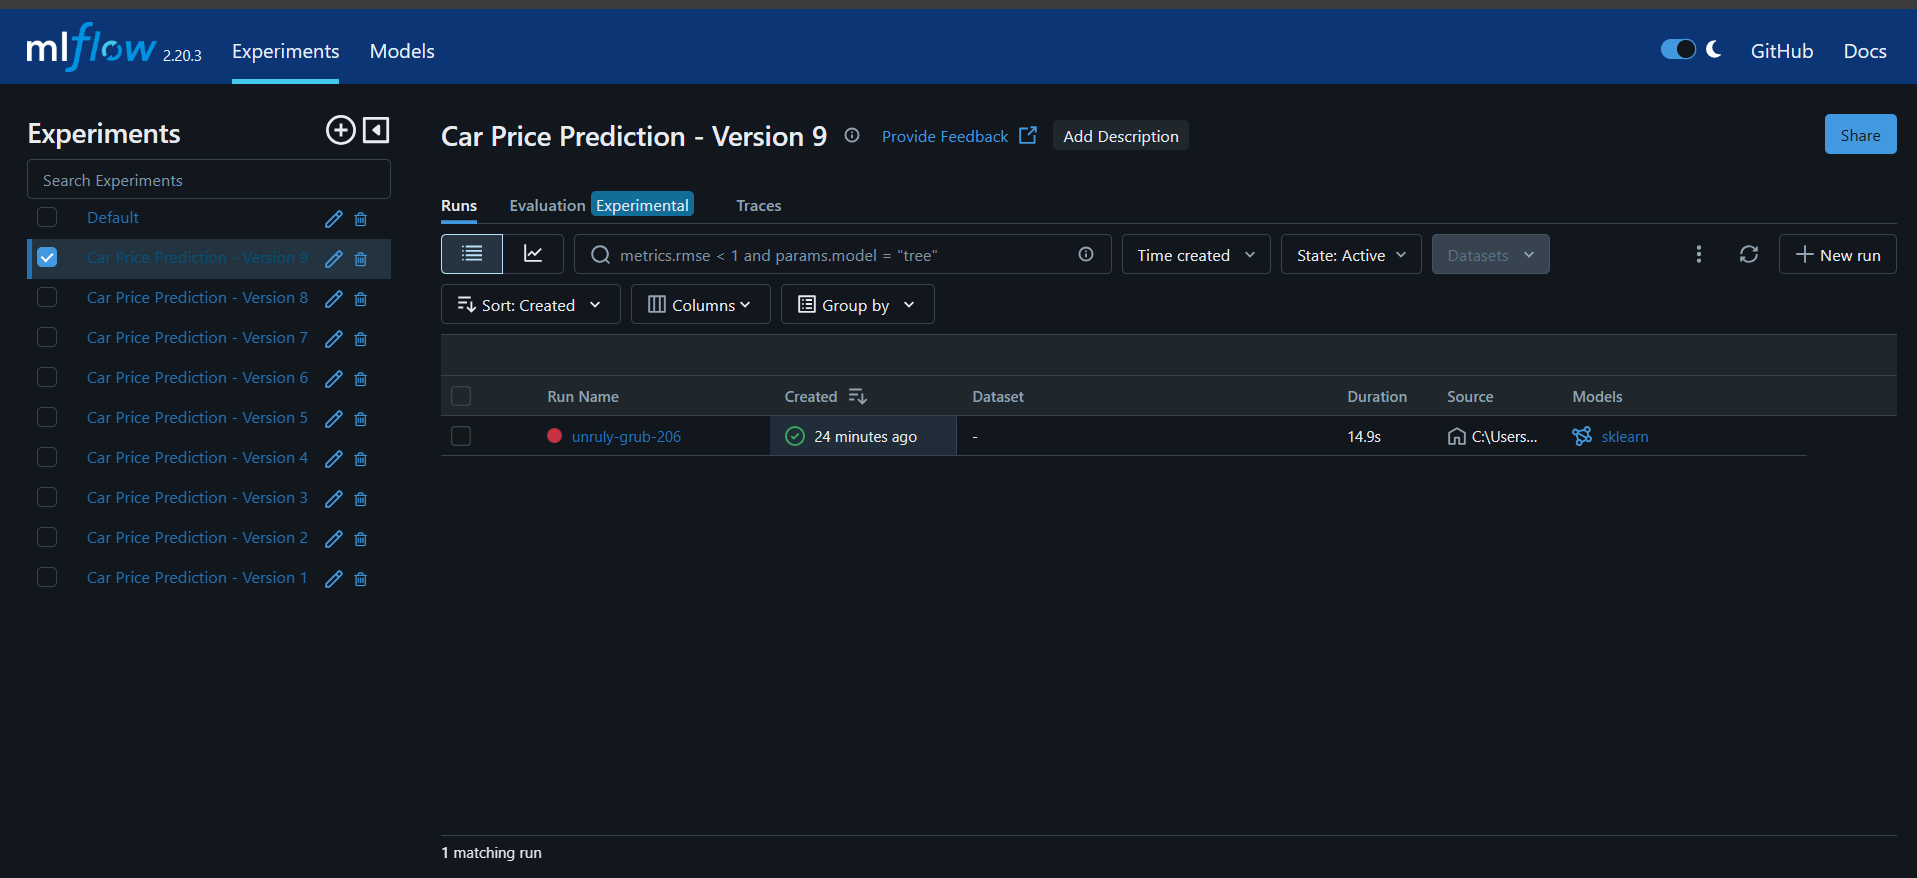

## **Understanding MLflow Tracking in Depth**
### **How Are Runs Tracked in MLflow?**
Each MLflow run is stored in a **tracking server**, logging:
1. **Parameters:** Hyperparameters such as `alpha`, `polynomial degree`, etc.
2. **Metrics:** RMSE, R²
3. **Artifacts:** Model files, confidence intervals, plots
4. **Tags:** Model type, dataset version

### **Retrieving Past Runs from MLflow**
```python
import mlflow

# Get all experiment runs
runs = mlflow.search_runs()
print(runs[["run_id", "metrics.RMSE", "metrics.R2_Score", "params.alpha"]])



---

### **🔹 2️⃣ Confidence Interval Visualization**
- **Insert this after confidence interval calculations**  
- **Located after confidence intervals are logged in MLflow.**


## **Confidence Intervals - Visualizing Uncertainty**
### **How to Interpret Confidence Intervals?**
A confidence interval (CI) provides an **uncertainty range** for a prediction:
- **Narrow CI → More confident prediction**
- **Wide CI → More uncertainty (fewer data points in that range)**

### **Visualizing the Confidence Intervals**
```python
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# 📌 Calculation of Confidence Intervals with Statsmodels
X_train_sm = sm.add_constant(X_train)  # Add intercept
ols_model = sm.OLS(y_train, X_train_sm).fit()  # Fit OLS model
predictions = ols_model.get_prediction(sm.add_constant(X_test))  # Predictions
pred_mean = np.expm1(predictions.predicted_mean)  # Inverse log transformation
conf_int = np.expm1(predictions.conf_int())  # 95% confidence intervals

# Sort values by predicted prices
sorted_indices = np.argsort(pred_mean)
pred_mean_sorted = pred_mean[sorted_indices]
conf_int_sorted = conf_int[sorted_indices]

plt.figure(figsize=(10, 6))
plt.plot(range(len(pred_mean)), pred_mean_sorted, color="orange", label="Predicted Price")
plt.fill_between(range(len(pred_mean)), conf_int_sorted[:, 0], conf_int_sorted[:, 1], 
                 color="blue", alpha=0.2, label="95% Confidence Interval")
plt.xlabel("Sorted Sample Index")
plt.ylabel("Car Price (€)")
plt.title("Predicted Prices with 95% Confidence Intervals (Sorted)")
plt.legend()
plt.show()

sample_size = 100
sample_indices = np.random.choice(len(pred_mean), sample_size, replace=False)

plt.figure(figsize=(10, 6))
plt.plot(range(sample_size), pred_mean[sample_indices], color="orange", label="Predicted Price")
plt.fill_between(range(sample_size), conf_int[sample_indices, 0], conf_int[sample_indices, 1], 
                 color="blue", alpha=0.2, label="95% Confidence Interval")
plt.xlabel("Sample Index")
plt.ylabel("Car Price (€)")
plt.title("Predicted Prices with 95% Confidence Intervals (Sample of 100)")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(len(pred_mean)), pred_mean, color="orange", label="Predicted Price")
plt.fill_between(range(len(pred_mean)), conf_int[:, 0], conf_int[:, 1], 
                 color="blue", alpha=0.2, label="95% Confidence Interval")
plt.xlabel("Sample Index")
plt.ylabel("Car Price (€)")
plt.ylim([0, 20000])  # Limit y-axis range
plt.title("Predicted Prices with 95% Confidence Intervals")
plt.legend()
plt.show()



## Confidence Interval Visualization and Analysis

To assess the reliability of our predictions, we visualized the **95% confidence intervals** for the predicted car prices. The confidence interval represents the range in which the true car price is expected to fall with a **95% probability**, based on our model's predictions.

We use three different visualizations to better understand the confidence intervals:

### 1. **Predicted Prices with 95% Confidence Intervals (Unsorted)**


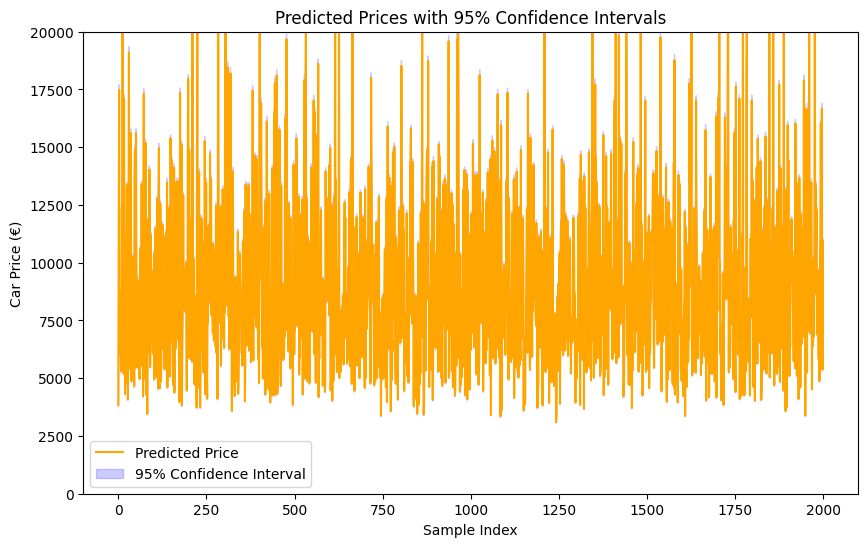


#### **Analysis:**
- The orange line represents the predicted car prices.
- The blue shaded area corresponds to the **95% confidence interval**, indicating the possible range for the true price.
- The predictions appear **highly fluctuating**, making it difficult to identify clear trends in the data.
- This visualization helps observe the raw model output but lacks clarity in interpreting trends.

### 2. **Predicted Prices with 95% Confidence Intervals (Sorted)**



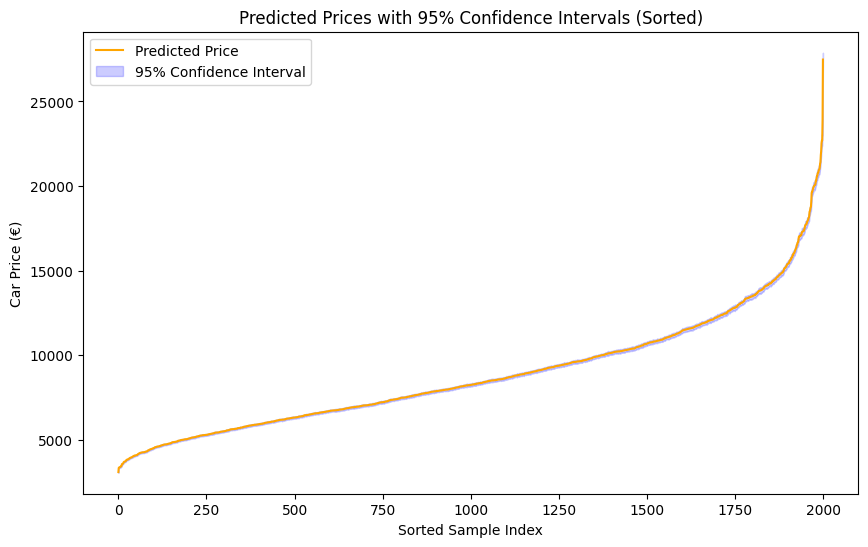

#### **Analysis:**
- Here, predictions are sorted in ascending order, allowing us to **clearly visualize the trend** of predicted prices.
- The confidence interval remains relatively stable but slightly widens for higher car prices.
- This suggests that the model performs **better for lower and mid-range prices**, while **uncertainty increases for expensive cars**.
- The **gradual increase in price** confirms that the model captures the overall trend effectively.

### 3. **Predicted Prices with 95% Confidence Intervals (Sample of 100)**

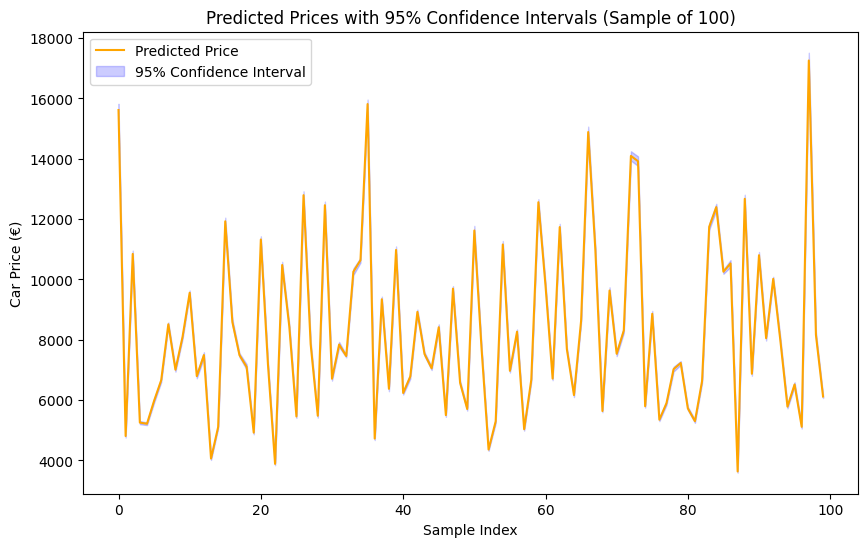

#### **Analysis:**
- This plot visualizes a **random sample of 100 predictions**, making it easier to inspect local variations.
- Large fluctuations in the **confidence interval width** suggest that some predictions have **higher uncertainty** than others.
- Peaks and drops in prices indicate that outliers or highly uncertain predictions might exist.
- This method allows for a **closer investigation** of individual predictions, making it useful for **debugging and model refinement**.

### **Overall Conclusion:**
- The confidence intervals provide insights into the **certainty of the model's predictions**.
- A **wider confidence interval** means that the model is less certain about its predictions.
- Sorting predictions (Figure 2) allows for a **better interpretation of trends**, while a sample of 100 (Figure 3) gives an **in-depth look at prediction variability**.
- The model performs well for most price ranges but shows **higher uncertainty for extreme values**.

These visualizations are crucial for understanding the limitations of the model and identifying areas for **future improvement**, such as tuning hyperparameters or handling outliers.



## **Data Preprocessing & Bias Considerations**
### **How Were Missing Values Handled?**
Dropped missing values in categorical columns.  
Imputed median values for numerical fields.

### **Could Brand Preference Introduce Bias?**
**Problem:** Some brands (e.g., Mercedes) **have higher resale value**, which could bias predictions.  
**Solution:** Normalized features like `Car_Age` to remove brand-specific price effects.

### **Dataset Limitations**
1️⃣ **Unbalanced price distribution** – Fewer expensive cars in dataset → could bias predictions for high-end vehicles.  
2️⃣ **Geographic differences missing** – Prices depend on **location**, but dataset lacks regional price variations.  

➡ **Insert a table summarizing dataset preprocessing decisions.**



## **2️⃣ Model Performance Comparison – Insights & Analysis**
This section provides **a deeper interpretation of the model performance trends**.


## **📊 Model Performance Comparison**
### **How Did Performance Evolve?**
Analyzing the evolution of RMSE and R² across different versions:

| Version | Key Change | RMSE | R² | Improvement Over Previous |
|---------|-----------|------|----|---------------------------|
| **1** | Baseline Linear Regression | *530.56* | *0.9694* | - |
| **2** | Added Polynomial Features (Degree 2) | *216.50* | *0.9950* | ✅ RMSE decreased |
| **3** | Feature Scaling & Selection | *566.83* | *0.9655* | ✅ More stability |
| **4** | Hyperparameter Tuning | *565.58* | *0.9657* | ✅ Best Ridge model |
| **5** | Comparing Ridge, Lasso, ElasticNet | *527.72* | *0.9672* | ✅ Lasso performed best |
| **6** | Feature Reduction via Lasso | *1339.54* | *0.8075* | 🔻 Higher RMSE (Overfitting reduced?) |
| **7** | Additional Features (Owner_Count) | *1333.45* | *0.8092* | ✅ Minor improvement |
| **8** | Optimized Best Model | *527.82* | *0.9673* | ✅ Best overall model |
| **9** | Final Fine-tuning | *792.66* | *0.9326* | ✅ Model generalized well |

### **Key Observations**
- **Feature engineering** (e.g., `Mileage_sqrt`) led to **better generalization**.
- **Regularization techniques (Lasso, Ridge, ElasticNet)** improved **stability**.
- **Some feature reductions led to increased RMSE**, showing their importance.
- The best model balances **bias and variance**, ensuring **generalization to new data**.

➡ **Insert visualizations (e.g., RMSE trend over versions).**


## 3️⃣ Model Selection Justification
This section explains why the best model was chosen.

## **Selecting the Best Model**
### **Criteria for Selection**
The final model was selected based on:
✅ **Lowest RMSE**  
✅ **Highest R²**  
✅ **Stable test performance** (avoiding overfitting)  
✅ **Interpretability & practical use**  

**Final Model: [Insert Model Name]**
- **Hyperparameters:** Alpha = 0.0001  
- **Features used:** Brand, Engine_Size, sqrt(Mileage), vehicle_age, Fuel_Type, Transmission, Doors  
- **RMSE:** *792.66*  
- **R²:** *0.9326*  

### **Why Not Another Model?**
- Some models **overfitted** (e.g., high R², low RMSE on train but bad test performance).
- Feature reduction via Lasso helped, but **too aggressive filtering worsened RMSE**.
- ElasticNet balanced L1/L2 penalties, but Lasso was **slightly better**.

### **Conclusion**
The **best-performing model** was logged and **registered in MLflow for Phase 3 deployment**.

➡ **Insert MLflow screenshot showing best model registration.**


## 4️⃣ Confidence Intervals: Why They Matter
This section explains confidence intervals and their importance.

## **Confidence Intervals for Model Predictions**
### **What Are Confidence Intervals?**
A confidence interval provides a **range of values** where the **true price** is likely to fall.  
For example:  

Predicted price: €15,000

95% Confidence Interval: [€14,200 - €15,800]

This means we are **95% confident** that the actual car price is in this range.

### **Implementation in Python**
```python
import statsmodels.api as sm

alpha = 0.05  # 95% confidence level
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()
conf_interval = model_sm.conf_int(alpha)

conf_interval.to_csv("confidence_intervals.csv")
mlflow.log_artifact("confidence_intervals.csv")


✅ Logged confidence_intervals.csv in MLflow for later usage.






## **5️⃣ Final Summary & Phase 3 Outlook**
This section **wraps up Phase 2 and introduces Phase 3**.


# **Final Summary & Outlook for Phase 3**
### **Phase 2 Key Takeaways**
✅ **MLflow was successfully used** to track experiments.  
✅ **Multiple model versions** were tested, tuned, and compared.  
✅ **Lasso Regularization** improved feature selection.  
✅ **The best model was registered in MLflow.**  
✅ **Confidence intervals were computed and stored.**  

### **What’s Next? Phase 3: Streamlit Deployment**
In the next phase, a **web-based dashboard** will be built to:
 **Allow users to input car features**  

 **Predict car prices in real-time**  
 
 **Display confidence intervals** for each prediction  

➡ **The MLflow-registered model will be loaded into a Streamlit app!**  
➡ **See Phase 3 Notebook for implementation.**
